In [4]:
# import the required packages 

import itertools
import numpy as np
import pandas as pd
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from collections import defaultdict

import pickle

## OBJECTIEVE 1: Identify the Popular Film Genres in the industry
   What is the most watched genre? 

   Which genre is most porpular?
   
   Which genre is most voted for? 

### EDA 

In [2]:
# upload the data
merged_data = pd.read_csv("cleaned_merged_data.csv")
merged_data.head(2)

,original_language,original_title,popularity,release_date,vote_average,vote_count,runtime_minutes,genres,averagerating,numvotes
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788,146.0,"Adventure,Fantasy,Mystery",7.7,425530
1,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610,98.0,"Action,Adventure,Animation",8.1,611299


In [3]:
# Create an empty list to store individual genres
genres_list = []

# Split genres in each row and add them directly to genres_list
for genres in merged_data["genres"]:
    genres_list.extend(genres.split(','))

# Count the number of films by genre
genres_sum = Counter(genres_list)

# Calculate the total number of genre entries for percentage calculation
total_genres = sum(genres_sum.values())

# Create a DataFrame from the Counter, including percentage calculation
genre_df = pd.DataFrame(genres_sum.items(), columns=["Genre", "Count"])
genre_df["Percentage"] = (genre_df["Count"] / total_genres) * 100

# Sort the DataFrame by 'Count' in descending order
genre_df = genre_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Display the table
print(genre_df.head(10))
print(" ")
print("The Top five top watched movies are Drama, Comedy, Documentary, Thriller and Horror")


         Genre  Count  Percentage
0        Drama   7252   21.745127
1       Comedy   3799   11.391304
2  Documentary   3142    9.421289
3     Thriller   3106    9.313343
4       Horror   2977    8.926537
5       Action   2006    6.014993
6      Romance   1596    4.785607
7        Crime   1545    4.632684
8    Adventure   1217    3.649175
9      Mystery   1091    3.271364
 
The Top five top watched movies are Drama, Comedy, Documentary, Thriller and Horror


In [10]:
# Sample structure for merged_data: A DataFrame containing "genres" and "popularity" columns
# merged_data = pd.DataFrame({'genres': [...], 'popularity': [...]})

# Create a dictionary to store popularity totals and counts by genre
genre_popularity = defaultdict(lambda: {'total_popularity': 0, 'count': 0})

# Iterate through each row in the dataset
for index, row in merged_data.iterrows():
    genres = row["genres"].split(',')
    popularity = row["popularity"]
    for genre in genres:
        genre_popularity[genre]['total_popularity'] += popularity
        genre_popularity[genre]['count'] += 1

# Calculate average popularity for each genre
average_popularity = {genre: data['total_popularity'] / data['count'] for genre, data in genre_popularity.items()}

# Convert the average popularity dictionary to a DataFrame for easy plotting
genre_popularity_df = pd.DataFrame(list(average_popularity.items()), columns=["Genre", "Average Popularity"])

# Sort the DataFrame by "Average Popularity" in descending order
genre_popularity_df = genre_popularity_df.sort_values(by="Average Popularity", ascending=False)
print(genre_popularity_df.head(10))

print(" ")
print("The most porpular genre are Adventure, Animation, Action, Fantansy and Crime")



        Genre  Average Popularity
0   Adventure            8.215844
4   Animation            7.729220
3      Action            6.996766
1     Fantasy            6.559962
10      Crime            5.545509
5      Sci-Fi            5.537268
2     Mystery            4.887088
7      Comedy            4.423797
14    Romance            4.359005
15  Biography            4.250948
 
The most porpular genre are Adventure, Animation, Action, Fantansy and Crime


<Axes: xlabel='averagerating'>

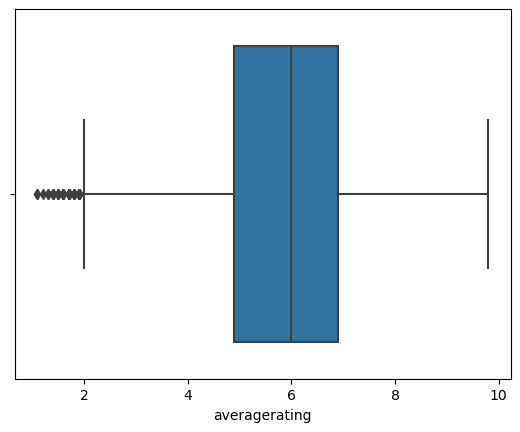

In [17]:
# checking for outliers using sns library and box plot
sns.boxplot(x =merged_data['averagerating'])

<Axes: xlabel='averagerating'>

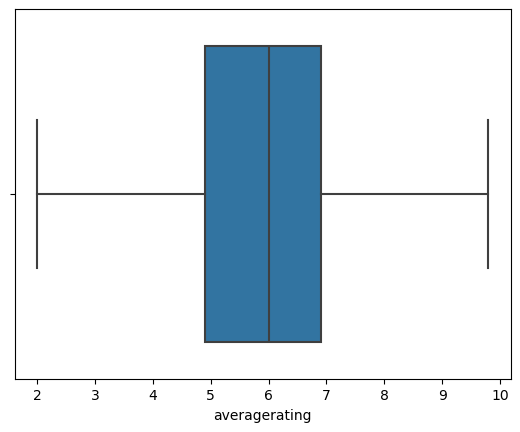

In [19]:
# We will use the interquatile range to calculate and filter out outliers
# Calculate the IQR
Q1 = merged_data['averagerating'].quantile(0.25)
Q3 = merged_data['averagerating'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
merged_data1 = merged_data[(merged_data['averagerating'] >= lower_bound) & (merged_data['averagerating'] <= upper_bound)]

# checking for outliers using sns library and box plot
sns.boxplot(x =merged_data1['averagerating'])

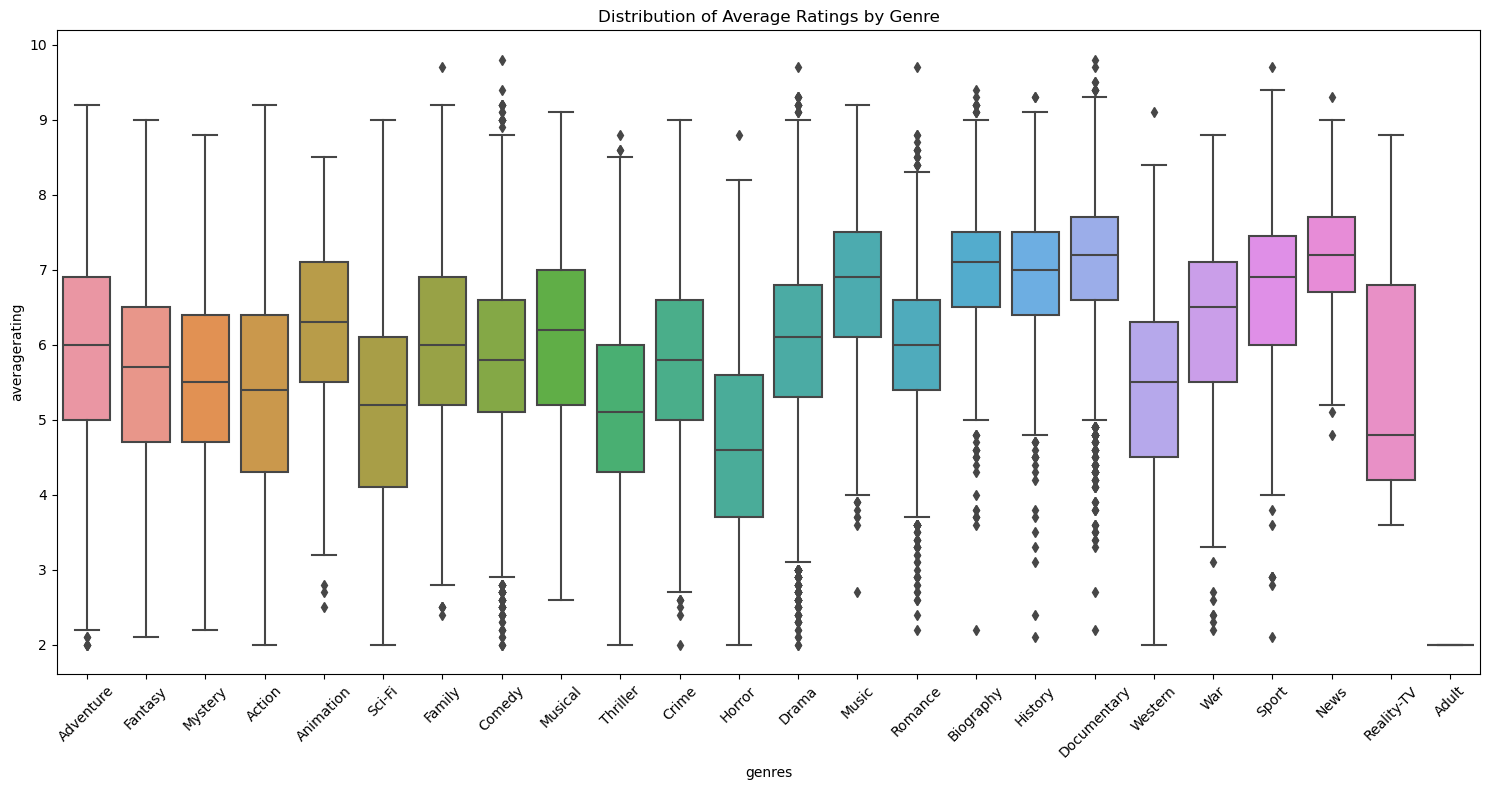

 
The Adventure genre has a median rating of around 6.
Fantasy has a median rating of about 5.5, which is slightly lower than Adventure.
Mystery has a median rating close to 6, similar to Adventure but with a tighter IQR


In [31]:
# Split genres and explode to analyze each genre separately
df_exploded = merged_data1.assign(genres=merged_data1['genres'].str.split(',')).explode('genres')


# Create plots for averagerating distribution by genre
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_exploded, x='genres', y='averagerating')
plt.xticks(rotation=45)
plt.title('Distribution of Average Ratings by Genre')
plt.tight_layout()
plt.show()

print(" ")
print("The Adventure genre has a median rating of around 6.")
print("Fantasy has a median rating of about 5.5, which is slightly lower than Adventure.")
print("Mystery has a median rating close to 6, similar to Adventure but with a tighter IQR")


### Statistical Distribution

In [40]:
# Display summary statistics to understand the distribution of numerical columns
print(merged_data.describe())

         popularity  vote_average    vote_count  runtime_minutes  \
count  16402.000000  16402.000000  16402.000000     16402.000000   
mean       3.888187      5.731478    283.187050        93.605597   
std        5.008357      1.718946   1151.691744        18.710496   
min        0.600000      0.000000      1.000000         3.000000   
25%        0.665000      4.900000      2.000000        84.000000   
50%        1.787000      5.900000      8.000000        91.000000   
75%        5.774750      6.800000     55.000000       101.000000   
max       80.773000     10.000000  22186.000000       724.000000   

       averagerating      numvotes  
count   16402.000000  1.640200e+04  
mean        5.848488  1.496057e+04  
std         1.407888  6.320184e+04  
min         1.100000  5.000000e+00  
25%         4.900000  9.700000e+01  
50%         6.000000  4.220000e+02  
75%         6.900000  2.889250e+03  
max         9.800000  1.841066e+06  


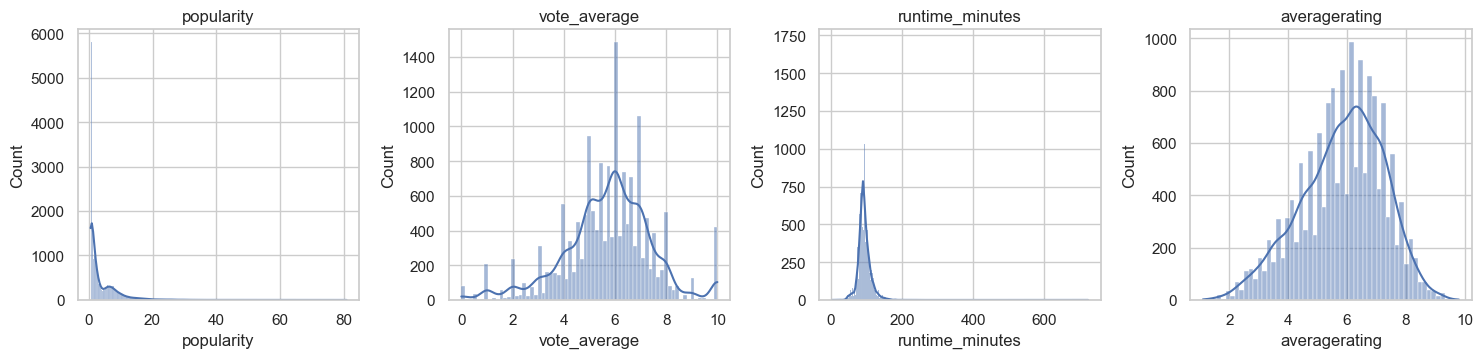

In [45]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Plot histograms for each numerical column
numerical_columns = ['popularity', 'vote_average', 'runtime_minutes', 'averagerating']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(merged_data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

# Findings

## EDA

1. The Top five top watched movies are Drama, Comedy, Documentary, Thriller and Horror. 

2. The most porpular genre are Adventure, Animation, Action, Fantansy and Crime

3. The **Adventure** genre has a median rating of around 6. The IQR (middle 50% of ratings) stretches roughly from 5 to 7.5, suggesting that Adventure movies receive fairly moderate ratings, with most falling between 5 and 7.5. 

    **Fantasy** has a median rating of about 5.5, which is slightly lower than Adventure. The IQR spans from about 4.5 to 7, indicating more variability in ratings but still within a moderate range. This genre is more likely to have a wider spread in ratings.

## Statistical Distribution

4. This plot indicates that most movies tend to receive moderate ratings, with the majority scoring between 5 and 7. Very high (near 10) or very low (near 2) ratings are rare, which suggests that extreme responses to movies are uncommon in this dataset.
